In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

ImportError: DLL load failed while importing _pywrap_tf2: The specified module could not be found.

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path= 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_hight = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


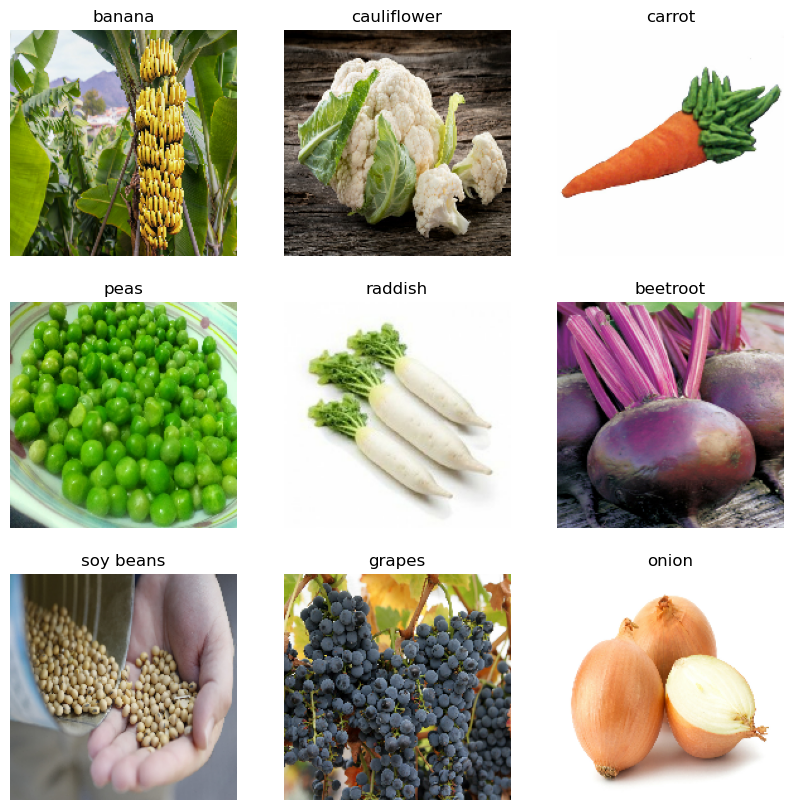

In [27]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat)),
])

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
epochs = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs,batch_size=32,verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 763ms/step - accuracy: 0.1146 - loss: 3.3303 - val_accuracy: 0.3020 - val_loss: 2.3536
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 745ms/step - accuracy: 0.3040 - loss: 2.4091 - val_accuracy: 0.5071 - val_loss: 1.6397
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 745ms/step - accuracy: 0.4738 - loss: 1.8571 - val_accuracy: 0.7464 - val_loss: 0.9922
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 747ms/step - accuracy: 0.6456 - loss: 1.2414 - val_accuracy: 0.8291 - val_loss: 0.7030
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 621ms/step - accuracy: 0.7692 - loss: 0.8074 - val_accuracy: 0.8803 - val_loss: 0.5211
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 500ms/step - accuracy: 0.8523 - loss: 0.5132 - val_accuracy: 0.9345 - val_loss: 0.4542
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 489ms/step - accuracy: 0.9011 - loss: 0.3643 - val_accuracy: 0.9373 - val_loss: 0.4834
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.9268 - loss: 0.2793 - val_accu

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,979,854 (45.70 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,986,570 (30.47 MB)

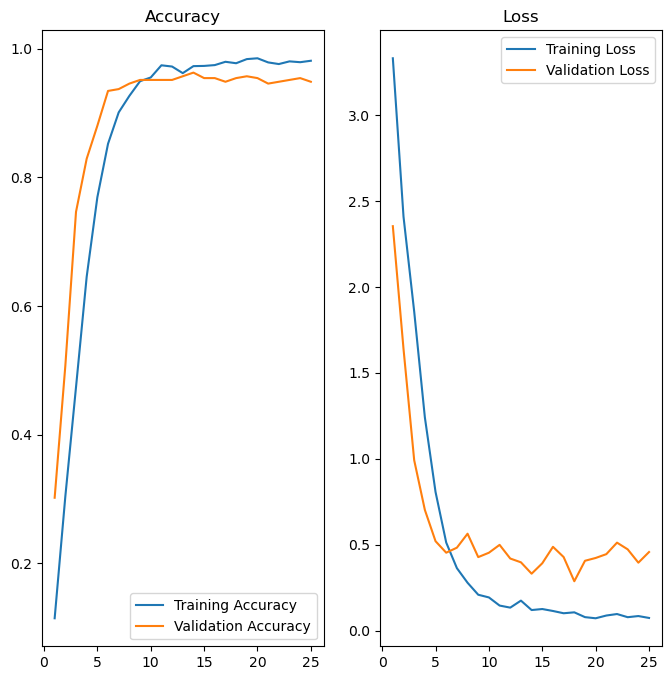

In [45]:
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,8))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [79]:
image = '111.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_hight,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [80]:
predcit = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [81]:
score = tf.nn.softmax(predcit)

In [82]:
print('Veg/fruit in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))


Veg/fruit in the image is pineapple with accuracy of 100.00


In [ ]:
model.save('furits_and_veg_image_classfication.keras')

In [71]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']